# Importing necessary packages and loading the CSV data into pandas dataframe

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

In [2]:
df = pd.read_csv(r"data\Copper_Set.csv")
df.head(4)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00


## Extracting the information about the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [4]:
print("Missing values in each column:\n{}".format(df.isnull().sum()))

Missing values in each column:
id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64


In [5]:
print("Showing the unique values in the database")
item_data_unique = str(len(df['item_date'].unique()))
print("item_date "+ item_data_unique) 
print("item_date"+str(len(df['customer'].unique())))
print(len(df['material_ref'].unique()))
print(len(df['product_ref'].unique())) #
print(len(df['delivery date'].unique())) # 

Showing the unique values in the database
item_date 253
item_date1170
16564
33
29


In [6]:
print("Unique values in each categorical column:")
for col in df.select_dtypes(include=[object]):
    print(col,":", df[col].unique())

Unique values in each categorical column:
id : ['EC06F063-9DF0-440C-8764-0B0C05A4F6AE'
 '4E5F4B3D-DDDF-499D-AFDE-A3227EC49425'
 'E140FF1B-2407-4C02-A0DD-780A093B1158' ...
 '91643238-5C7B-4237-9A5F-63AE3D35F320'
 '7AFFD323-01D9-4E15-B80D-7D1B03498FC8'
 'AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC']
quantity tons : [54.15113862 768.0248392 386.1279489 ... '4.235593568' '-2000'
 '406.6865384']
status : ['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable' nan]
item type : ['W' 'WI' 'S' 'Others' 'PL' 'IPL' 'SLAWR']
material_ref : ['DEQ1 S460MC' '0000000000000000000000000000000000104991' 'S0380700' ...
 'MAS65550' '4.11043_1060X5_BRE' '202006170005.IO.1.1']


## Handling the data formats and missing values
### Used for regression model data

In [7]:
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [8]:
missing_values_count = df.isnull().sum()
print(missing_values_count)
print(df.shape)
df.info()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64
(181673, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181670 non-null  object 
 2   quantity tons  181672 non-null  float64
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 

In [9]:
# material_ref has large set of null values, so replacing them with unknown 
df['material_ref'].fillna('unknown', inplace=True)
# deleting the remaining null values as they are less than 1% of data which can be neglected
df = df.dropna()

In [10]:
missing_values_count = df.isnull().sum()
print(missing_values_count)
print(df.shape)

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64
(181631, 14)


In [11]:
dataframe_prediction =df.copy()

In [12]:
dataframe_numbers = df.select_dtypes(include = ['int64','float64'])
dataframe_numbers.head()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
0,54.151139,30156308.0,28.0,10.0,2.00,1500.0,1670798778,854.00
1,768.024839,30202938.0,25.0,41.0,0.80,1210.0,1668701718,1047.00
2,386.127949,30153963.0,30.0,28.0,0.38,952.0,628377,644.33
3,202.411065,30349574.0,32.0,59.0,2.30,1317.0,1668701718,768.00
4,785.526262,30211560.0,28.0,10.0,4.00,2000.0,640665,577.00


In [13]:
dataframe_numbers.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816310e+05,1.816310e+05,181631.000000,181631.000000,181631.000000,181631.000000,1.816310e+05,1.816310e+05
mean,5.876231e+03,3.023251e+07,44.893201,25.615974,2.564198,1295.267162,4.740398e+08,1.918367e+03
std,2.349346e+06,1.005626e+05,24.404303,17.753821,6.572637,261.644078,7.175426e+08,3.318331e+05
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03
25%,1.096801e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,3.036395e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716187e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,3.040818e+07,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


### Statistical analysis and plotting

In [16]:
import numpy as np
def remove_c_price_outliers(df):
    
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('item type'):
        m =np.mean(subdf.selling_price)
        stdev =np.std(subdf.selling_price)
        for i in range(10):
            #print("mean :{}, std : {} ".format(m, stdev))
            #print("price_per_sqft :{}, mean-standard-deviation : {} ,mean+standard-deviation : {} ".format(subdf.price_per_sqft.sum(), m-stdev, m+stdev))
            break
        reduced_df = subdf[(subdf.selling_price > (m-stdev)) & (subdf.selling_price < (m+stdev))]
        df_out = pd.concat([df_out, reduced_df],ignore_index = True)
    return df_out

In [17]:
dataframe_prediction = remove_c_price_outliers(dataframe_prediction)
print(dataframe_prediction.shape)

(171754, 14)


array([[<Axes: title={'center': 'quantity tons'}>,
        <Axes: title={'center': 'customer'}>,
        <Axes: title={'center': 'country'}>],
       [<Axes: title={'center': 'application'}>,
        <Axes: title={'center': 'thickness'}>,
        <Axes: title={'center': 'width'}>],
       [<Axes: title={'center': 'product_ref'}>,
        <Axes: title={'center': 'selling_price'}>, <Axes: >]],
      dtype=object)

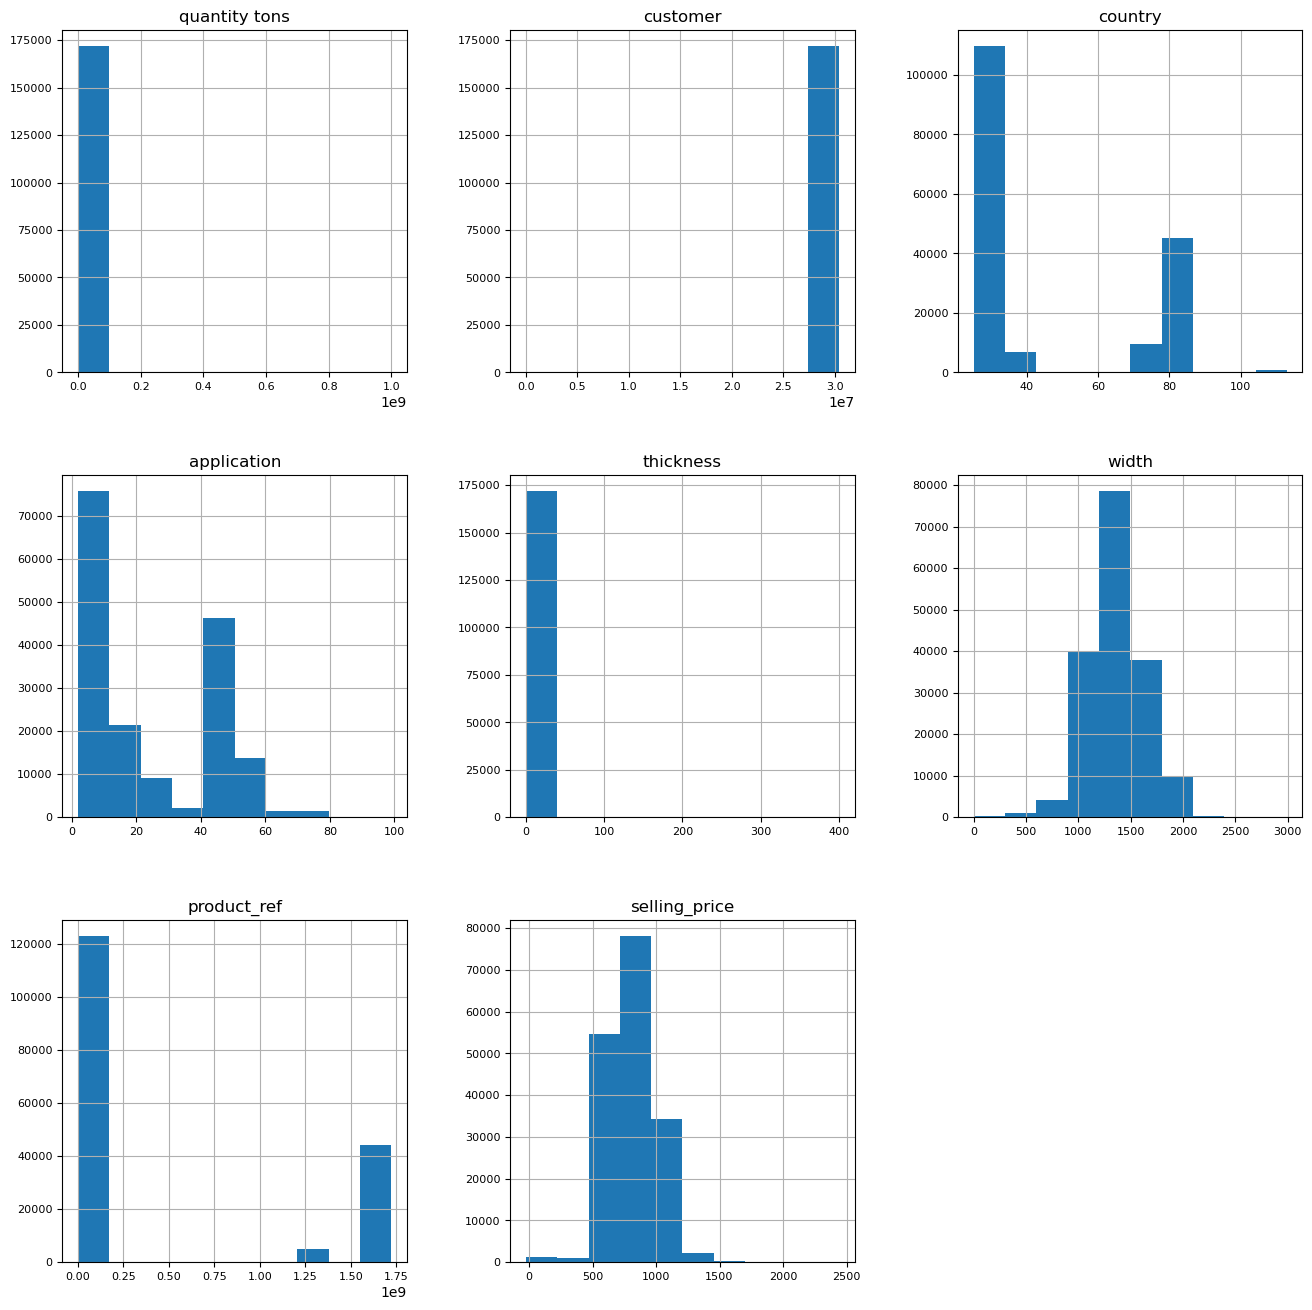

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
dataframe_prediction.hist(figsize=(16, 16), xlabelsize=8, ylabelsize=8)

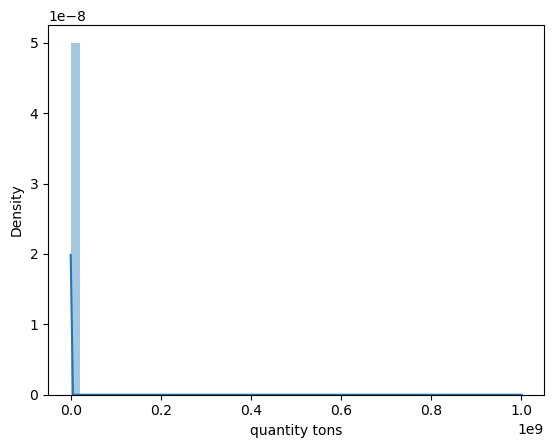

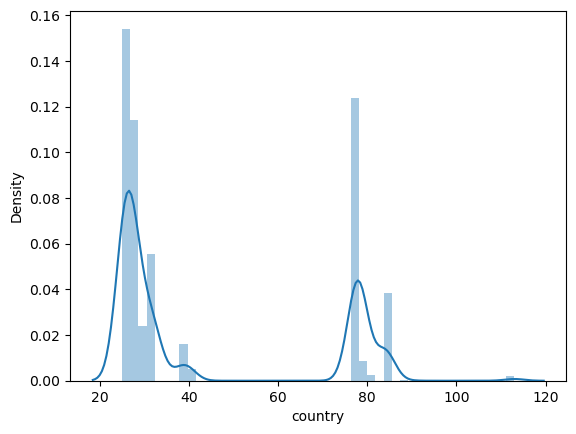

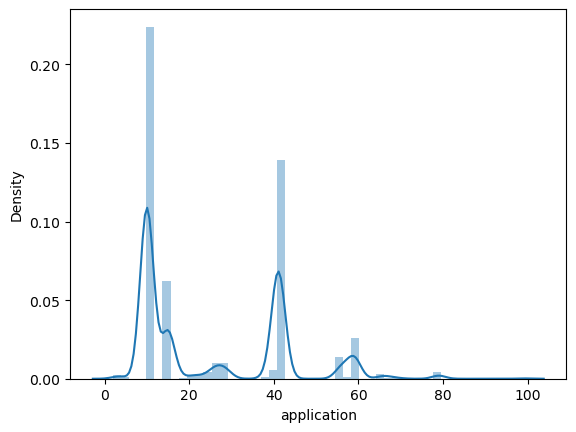

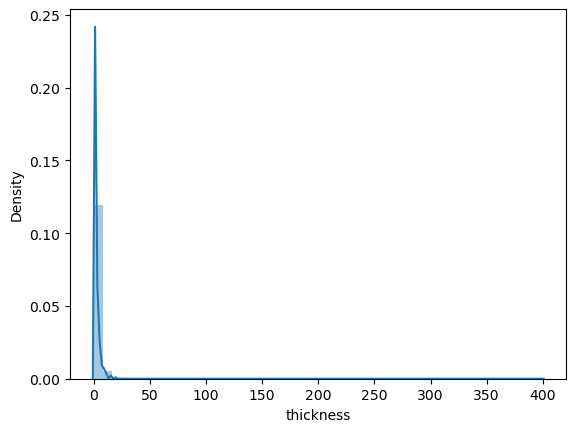

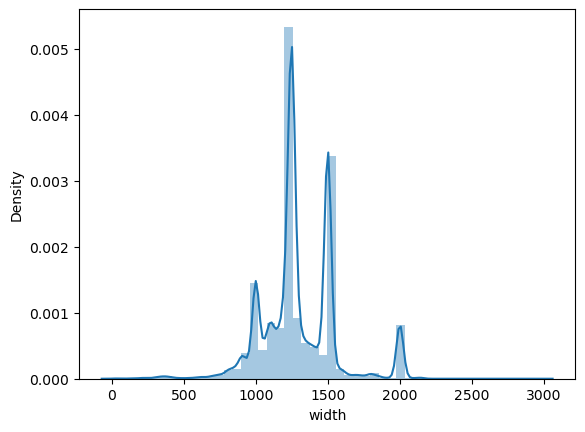

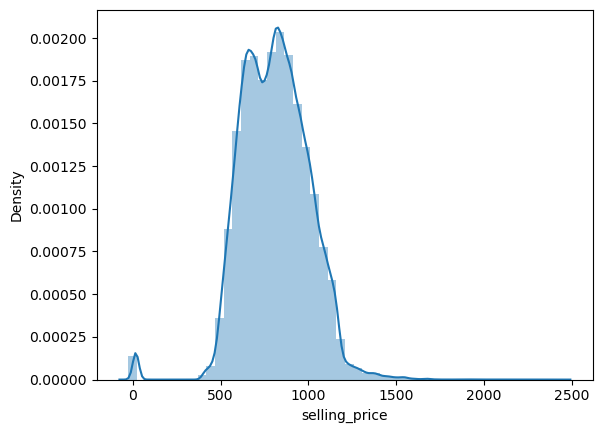

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(dataframe_prediction['quantity tons'])
plt.show()
sns.distplot(dataframe_prediction['country'])
plt.show()
sns.distplot(dataframe_prediction['application'])
plt.show()
sns.distplot(dataframe_prediction['thickness'])
plt.show()
sns.distplot(dataframe_prediction['width'])
plt.show()
sns.distplot(dataframe_prediction['selling_price'])
plt.show()


In [20]:
import numpy as np
mask1 = dataframe_prediction['selling_price'] <= 0
print(mask1.sum())
dataframe_prediction.loc[mask1, 'selling_price'] = np.nan

mask1 = dataframe_prediction['quantity tons'] <= 0
print(mask1.sum())
dataframe_prediction.loc[mask1, 'quantity tons'] = np.nan

mask1 = dataframe_prediction['thickness'] <= 0
print(mask1.sum())


1
4
0


In [21]:
dataframe_prediction.isnull().sum().sort_values(ascending = False)

quantity tons    4
selling_price    1
id               0
item_date        0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
dtype: int64

In [22]:
dataframe_prediction.shape

(171754, 14)

In [23]:
dataframe_prediction.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,073369B9-37B0-4441-8CB4-CAB661275497,2021-03-17,10.077413,30161856.0,26.0,Won,IPL,41.0,1.5,1192.0,ARC2WB0020,1670798778,2021-04-01,849.0
1,024F6B1B-462A-442C-B337-022B5E0FC3B3,2021-03-17,2.913818,30161856.0,26.0,Won,IPL,41.0,1.5,1192.0,ARC2WB0020,1670798778,2021-04-01,843.0
2,ECF373C3-DF1B-4F19-9056-F6DADDDD9587,2021-03-12,1.547987,30299962.0,28.0,Won,IPL,10.0,5.0,1500.0,G04CDY0000002427LAC-BUG,640665,2021-04-01,790.0
3,846EBDB3-6974-4363-89BE-23CA1A86D731,2021-03-12,3.150858,30299962.0,28.0,Won,IPL,10.0,6.0,2150.0,G01CFO0000043231LAC-NER,640665,2021-04-01,812.0
4,77836E6B-7555-4612-AEA2-1E22EE0B8552,2021-03-12,8.675440,30299962.0,28.0,Won,IPL,10.0,6.0,2150.0,G01CFO0000043231LAC-NER,640665,2021-04-01,820.0


In [24]:
dataframe_prediction.dropna(inplace=True)
len(dataframe_prediction)

171749

In [25]:
dataframe_prediction.isnull().sum().sort_values(ascending = False)

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

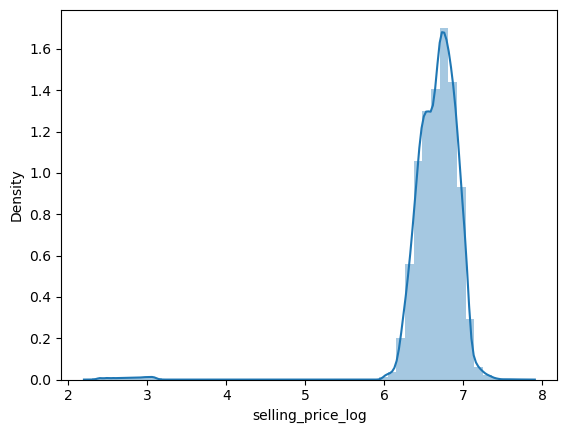

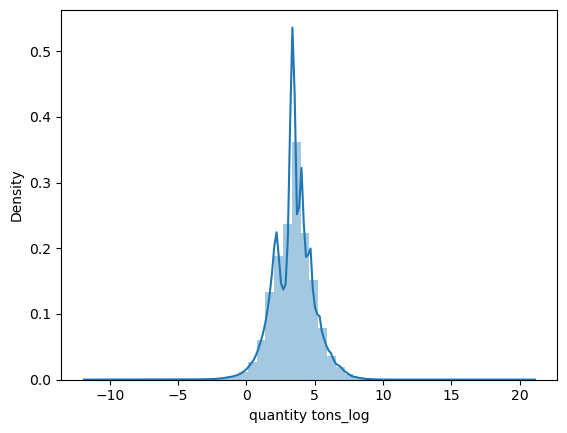

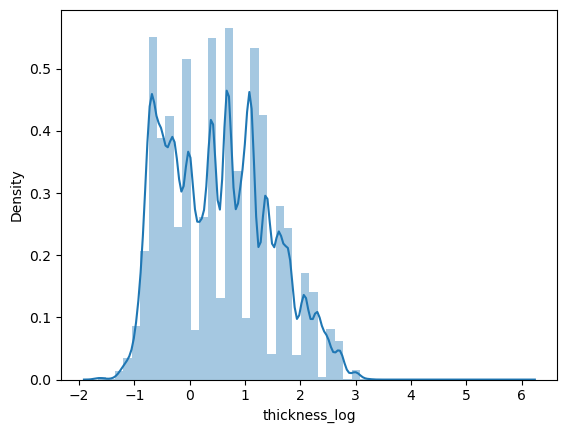

In [26]:
import numpy as np
dataframe_prediction['selling_price_log'] = np.log(dataframe_prediction['selling_price'])
sns.distplot(dataframe_prediction['selling_price_log'])
plt.show()

dataframe_prediction['quantity tons_log'] = np.log(dataframe_prediction['quantity tons'])
sns.distplot(dataframe_prediction['quantity tons_log'])
plt.show()

dataframe_prediction['thickness_log'] = np.log(dataframe_prediction['thickness'])
sns.distplot(dataframe_prediction['thickness_log'])
plt.show()
# reverts log
# dataframe_prediction['reverted_values'] = np.exp(dataframe_prediction['selling_price_log'])
# sns.distplot(dataframe_prediction['reverted_values'])
# plt.show()

In [27]:
dataframe_prediction.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_log,quantity tons_log,thickness_log
0,073369B9-37B0-4441-8CB4-CAB661275497,2021-03-17,10.077413,30161856.0,26.0,Won,IPL,41.0,1.5,1192.0,ARC2WB0020,1670798778,2021-04-01,849.0,6.744059,2.310297,0.405465
1,024F6B1B-462A-442C-B337-022B5E0FC3B3,2021-03-17,2.913818,30161856.0,26.0,Won,IPL,41.0,1.5,1192.0,ARC2WB0020,1670798778,2021-04-01,843.0,6.736967,1.069464,0.405465
2,ECF373C3-DF1B-4F19-9056-F6DADDDD9587,2021-03-12,1.547987,30299962.0,28.0,Won,IPL,10.0,5.0,1500.0,G04CDY0000002427LAC-BUG,640665,2021-04-01,790.0,6.672033,0.436955,1.609438
3,846EBDB3-6974-4363-89BE-23CA1A86D731,2021-03-12,3.150858,30299962.0,28.0,Won,IPL,10.0,6.0,2150.0,G01CFO0000043231LAC-NER,640665,2021-04-01,812.0,6.699500,1.147675,1.791759
4,77836E6B-7555-4612-AEA2-1E22EE0B8552,2021-03-12,8.675440,30299962.0,28.0,Won,IPL,10.0,6.0,2150.0,G01CFO0000043231LAC-NER,640665,2021-04-01,820.0,6.709304,2.160496,1.791759


In [28]:
x=dataframe_prediction[['quantity tons_log','application','thickness_log','width','selling_price_log','country','customer','product_ref']].corr()

<Axes: >

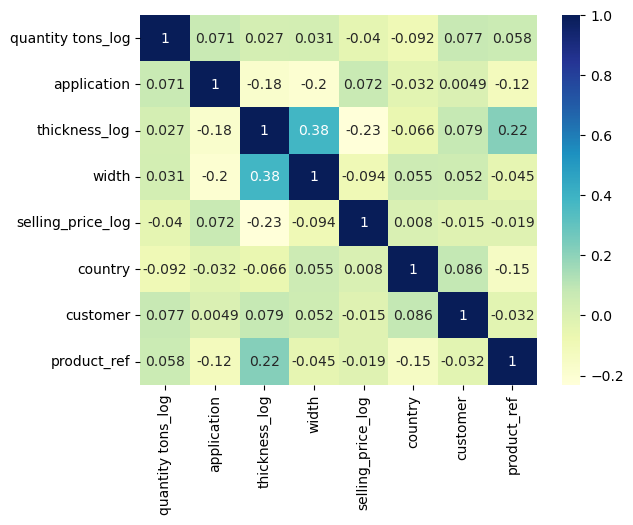

In [29]:
sns.heatmap(x, annot=True, cmap="YlGnBu")

# Analysing the various regression models

## DECISION TREE REGRESSOR 

   #### 1 Encode categorical features
   #### 2 Test and Train split
   #### 3 Define Hyperparameters for GridSearchCV
   #### 4 Train the DecisionTreeRegressor with best parameters
   #### 5 Evalution metrics
   #### 6 Predict the selling price for new values
   #### 7 Save the DecisionTreeRegressor model

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

X=dataframe_prediction[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y=dataframe_prediction['selling_price_log']
# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(X[['status']])
X_be = ohe2.fit_transform(X[['status']]).toarray()
# independent features after encoding
X = np.concatenate((X[['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [31]:
# decision tree
decisionTreeReg = DecisionTreeRegressor()
# hyperparameters

hyper_parameters_grid_rf = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
random_search_cv_rf = RandomizedSearchCV(estimator=decisionTreeReg, 
                                         param_distributions=hyper_parameters_grid_rf, 
                                         cv=5, n_iter = 50,
                                         scoring = 'neg_mean_absolute_error', n_jobs = 4,
                                         verbose = 5,
                                         return_train_score = True,
                                         random_state = 42
                                         )
                                         
random_search_cv_rf.fit(X_train, y_train)
print("Best hyperparameters:", random_search_cv_rf.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best hyperparameters: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20}


In [32]:
print("Best hyperparameters:", random_search_cv_rf.best_params_)
best_model = random_search_cv_rf.best_estimator_
y_pred = best_model.predict(X_test)
# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Best hyperparameters: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20}
Mean squared error: 0.022129810472045968
R-squared: 0.8683705693360306


## XGBoost Regressor

In [33]:
from xgboost import XGBRegressor

In [ ]:

# XGBRegressor
#xgbreg = XGBRegressor(tree_method='gpu_hist', gpu_id=0)
xgbreg = XGBRegressor()
# hyperparameters

booster = ['gbtree']
base_score = [0.25, 0.5, 0.75, 1]
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 5, 10, 20, 30]
learning_rate = [0.05, 0.1, 0.15, 0.20]
min_child_weight = [1, 2, 3, 4]
subsample = [0.5, 0.75, 1]
#lambda_ = [1, 2, 5]
# param['gpu_id'] = 0
# param['tree_method'] = 'gpu_hist'

hyper_parameters_grid_xgb = {
              'base_score' : base_score,
              'n_estimators' : n_estimators,
              'max_depth': max_depth,
              'learning_rate' : learning_rate,
              'min_child_weight' : min_child_weight,
              'subsample': subsample,
              'booster' : booster,
              'base_score' : base_score
              }
# gridsearchcv for cross validation with
random_search_cv_xgb = RandomizedSearchCV(estimator=xgbreg, 
                                          param_distributions=hyper_parameters_grid_xgb, 
                                          cv=5, n_iter = 50,
                                          scoring = 'neg_mean_absolute_error', n_jobs = 4,
                                          verbose = 5,
                                          return_train_score = True,
                                          random_state = 42
                                         )
random_search_cv_xgb.fit(X_train, y_train)
print("Best hyperparameters:", random_search_cv_xgb.best_params_)

In [ ]:
print("Best hyperparameters:", random_search_cv_xgb.best_params_)
best_model_xgb = random_search_cv_xgb.best_estimator_
y_pred = best_model_xgb.predict(X_test)
# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Best hyperparameters: {'subsample': 1, 'n_estimators': 1100, 'min_child_weight': 4, 'max_depth': 30, 'learning_rate': 0.05, 'booster': 'gbtree', 'base_score': 0.25}
Mean squared error: 0.01970359121618107
R-squared: 0.9388412045255288

In [ ]:

xgbreg2 = XGBRegressor(subsample= 1, n_estimators = 1100, min_child_weight= 5, 
                       max_depth = 50, learning_rate= 0.05, booster= 'gbtree',
                       base_score= 0.25)
xgbreg2.fit(X_train, y_train)
#best_model_xgb = random_search_cv_xgb.best_estimator_
y_pred = xgbreg2.predict(X_test)
# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

In [ ]:
# ['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be
new_sample = np.array([[np.log(40), 10, np.log(250), 0, 28,30202938,1670798778,'PL','Won']])
new_sample_ohe = ohe.transform(new_sample[:, [7]]).toarray()
new_sample_be = ohe2.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,]], new_sample_ohe, new_sample_be), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = best_model_xgb.predict(new_sample1)
print('Predicted selling price:', np.exp(new_pred))

In [ ]:
# Saving the model
import pickle
with open(r"regression_models\regmode3.pkl", 'wb') as file:
    pickle.dump(best_model_xgb, file)
with open(r"regression_models\scaler3.pkl", 'wb') as f:
    pickle.dump(scaler, f)
with open(r"regression_models\t.pkl", 'wb') as f:
    pickle.dump(ohe, f)
with open(r"regression_models\s.pkl", 'wb') as f:
    pickle.dump(ohe2, f)

In [35]:
print(len(dataframe_prediction))
dataframe_prediction.head(3)

171749


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_log,quantity tons_log,thickness_log
0,073369B9-37B0-4441-8CB4-CAB661275497,2021-03-17,10.077413,30161856.0,26.0,Won,IPL,41.0,1.5,1192.0,ARC2WB0020,1670798778,2021-04-01,849.0,6.744059,2.310297,0.405465
1,024F6B1B-462A-442C-B337-022B5E0FC3B3,2021-03-17,2.913818,30161856.0,26.0,Won,IPL,41.0,1.5,1192.0,ARC2WB0020,1670798778,2021-04-01,843.0,6.736967,1.069464,0.405465
2,ECF373C3-DF1B-4F19-9056-F6DADDDD9587,2021-03-12,1.547987,30299962.0,28.0,Won,IPL,10.0,5.0,1500.0,G04CDY0000002427LAC-BUG,640665,2021-04-01,790.0,6.672033,0.436955,1.609438


In [36]:
dataframe_classification = dataframe_prediction[dataframe_prediction['status'].isin(['Won', 'Lost'])]
len(dataframe_classification)

143576

## DECISION TREE CLASSIFIER

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer

Y = dataframe_classification['status']
X= dataframe_classification[['quantity tons_log','selling_price_log','item type','application','thickness_log','width','country','customer','product_ref']]

# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
be = LabelBinarizer()
be.fit(Y) 
y = be.fit_transform(Y)
# independent features after encoding
X = np.concatenate((X[['quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")


Accuracy: 0.9149254770859451
Confusion Matrix:
[[ 5609  1197]
 [ 1246 20664]]


Confusion Matrix:
[[ 5609  1197]
 [ 1246 20664]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      6806
           1       0.95      0.94      0.94     21910

    accuracy                           0.91     28716
   macro avg       0.88      0.88      0.88     28716
weighted avg       0.92      0.91      0.92     28716



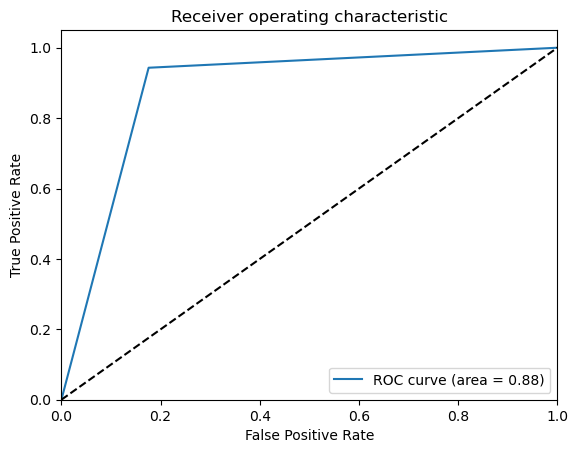

In [38]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Predict the status for a new sample
# 'quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe
new_sample = np.array([[np.log(700), np.log(956), 10, np.log(2),1500,28.0,30202938,1670798778,'W']])
new_sample_ohe = ohe.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_ohe), axis=1)
new_sample = scaler.transform(new_sample)
new_pred = dtc.predict(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

In [ ]:
# Saving the model
import pickle
with open(r"classification_models\classification_model1.pkl", 'wb') as file:
    pickle.dump(dtc, file)
with open(r"classification_models\classification_scaler.pkl", 'wb') as f:
    pickle.dump(scaler, f)
with open(r"classification_models\classification_data_transform.pkl", 'wb') as f:
    pickle.dump(ohe, f)